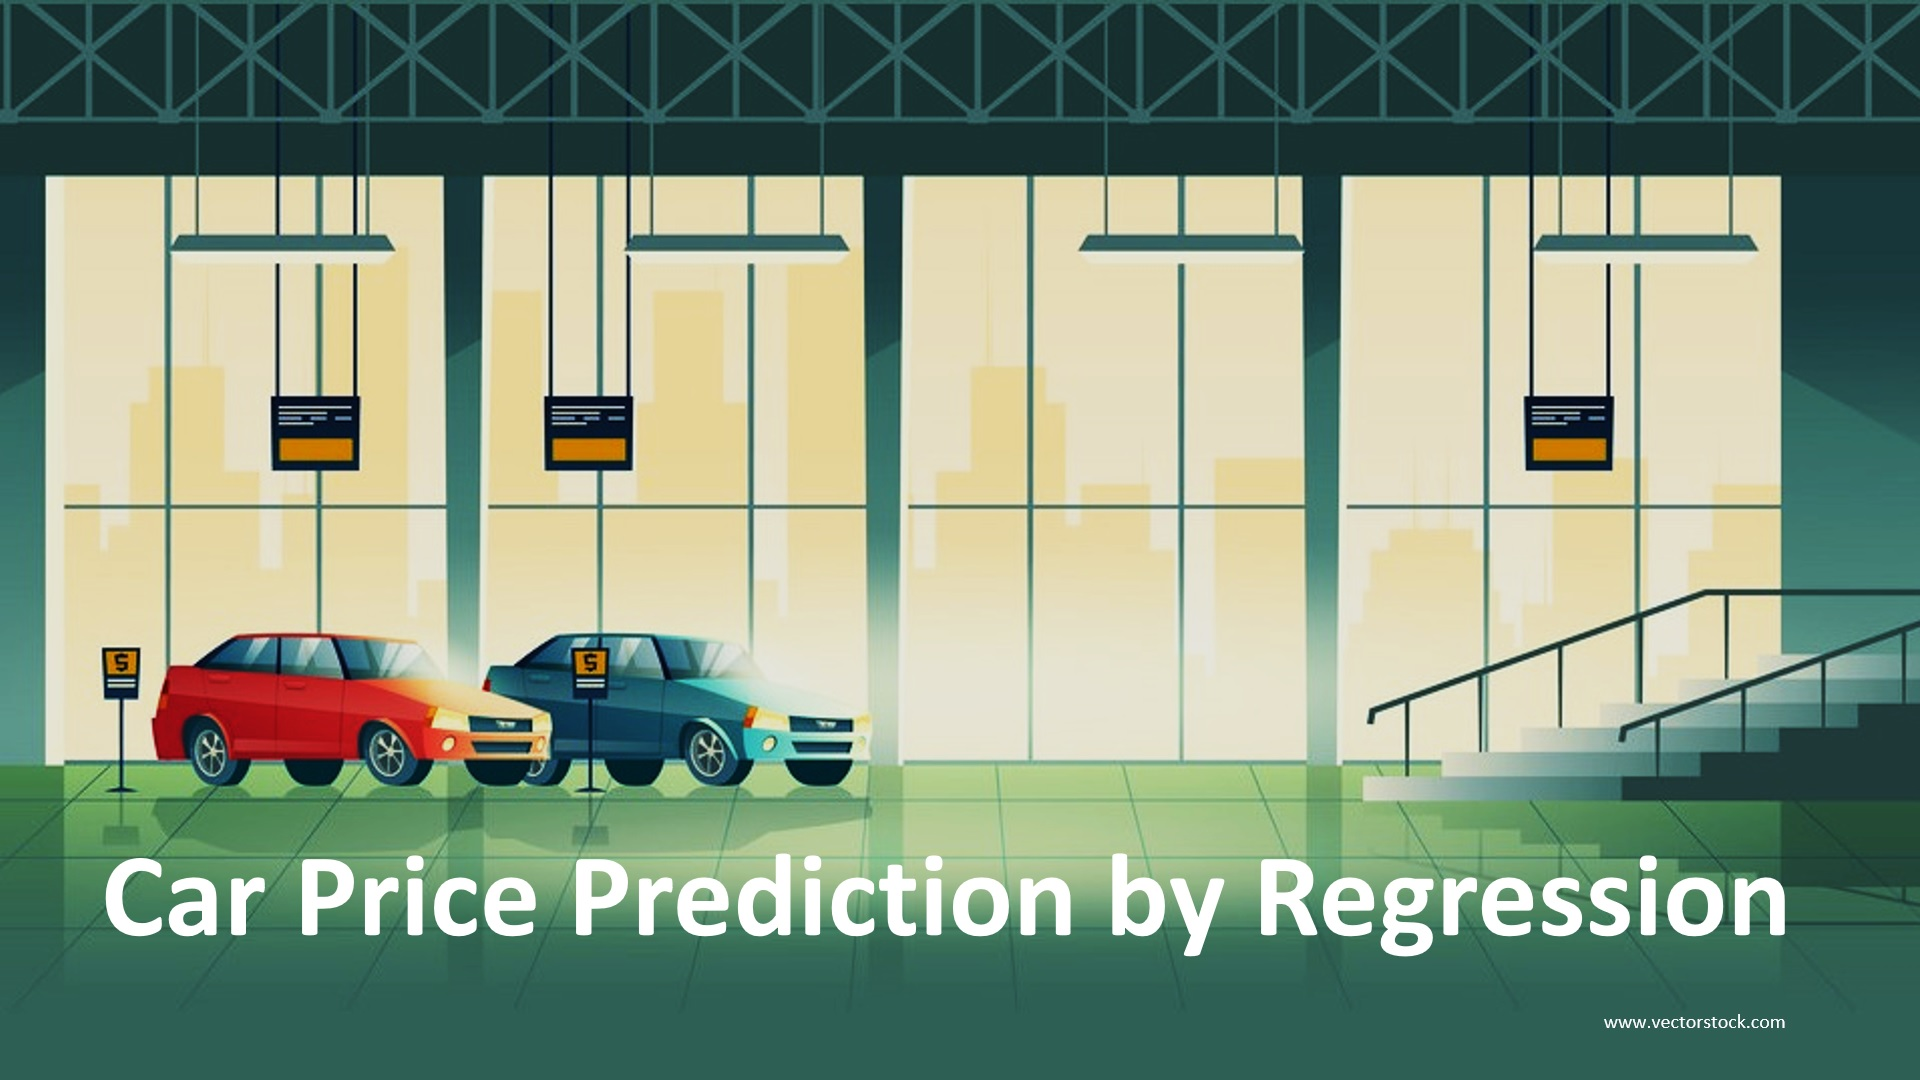

# 💾 About Data

<table style="width:80%;margin:auto;border-collapse:separate;border-spacing:0;font-family:'Segoe UI',Tahoma,sans-serif;border:1px solid #ddd;border-radius:10px;overflow:hidden;box-shadow:0 2px 8px rgba(0,0,0,0.05);color:#000;">
  <thead>
    <tr style="background-color:#f7c59f;color:#000;">
      <th style="padding:14px;font-size:17px;text-align:left;border-bottom:2px solid #ddd;">Variable Name</th>
      <th style="padding:14px;font-size:17px;text-align:left;border-bottom:2px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Car_Name</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The name of each car.</td>
    </tr>
    <tr style="background-color:#fdf6f0;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Year</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The year that the car was bought.</td>
    </tr>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Selling_Price</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The price that the car has at the sale time.</td>
    </tr>
    <tr style="background-color:#fdf6f0;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Present_Price</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The price that car has right now.</td>
    </tr>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Kms_Driven</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The number of kilometers that the car is driven.</td>
    </tr>
    <tr style="background-color:#fdf6f0;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Fuel_Type</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The type of fuel that the car consumes.</td>
    </tr>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Seller_Type</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The type of car seller: individual or dealer.</td>
    </tr>
    <tr style="background-color:#fdf6f0;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Transmission</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The type of the car gear: manual or automatic.</td>
    </tr>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;">Owner</td>
      <td style="padding:12px;font-size:16px;">The number of previous owners of the car.</td>
    </tr>
  </tbody>
</table>


# 📚 Importing Libraries

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
from rich import print
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler


print("[green]Importing Libraries Successfully...[green]")


Importing Libraries Successfully...

# 🛠️ Data PreProcessing

## 📂 Load the data

In [226]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

print("[green]Data loaded Successfully...[green]")


Data loaded Successfully...

## 📊 Display random columns

In [227]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
177,Honda Activa 125,2016,0.35,0.57,24000,Petrol,Individual,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
232,elantra,2015,11.45,14.79,12900,Petrol,Dealer,Automatic,0
204,eon,2015,2.75,4.43,28282,Petrol,Dealer,Manual,0


## 🔢 Number of rows and columns

In [228]:
print("the number of rows:",df.shape[0])
print("the number of columns:",df.shape[1])

the number of rows: 301

the number of columns: 9

## 🔍 Some statistical measures

In [229]:
df.describe().T.round(2).style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
Year,301.000000,2013.630000,2.890000,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,301.000000,4.660000,5.080000,0.100000,0.900000,3.600000,6.000000,35.000000
Present_Price,301.000000,7.630000,8.640000,0.320000,1.200000,6.400000,9.900000,92.600000
Kms_Driven,301.000000,36947.210000,38886.880000,500.000000,15000.000000,32000.000000,48767.000000,500000.000000
Owner,301.000000,0.040000,0.250000,0.000000,0.000000,0.000000,0.000000,3.000000


In [230]:
df.describe(include="object").T.round(2)

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


In [231]:
df['Age'] = df['Year'].max()+1 - df['Year']
df.drop('Year',axis=1,inplace = True)

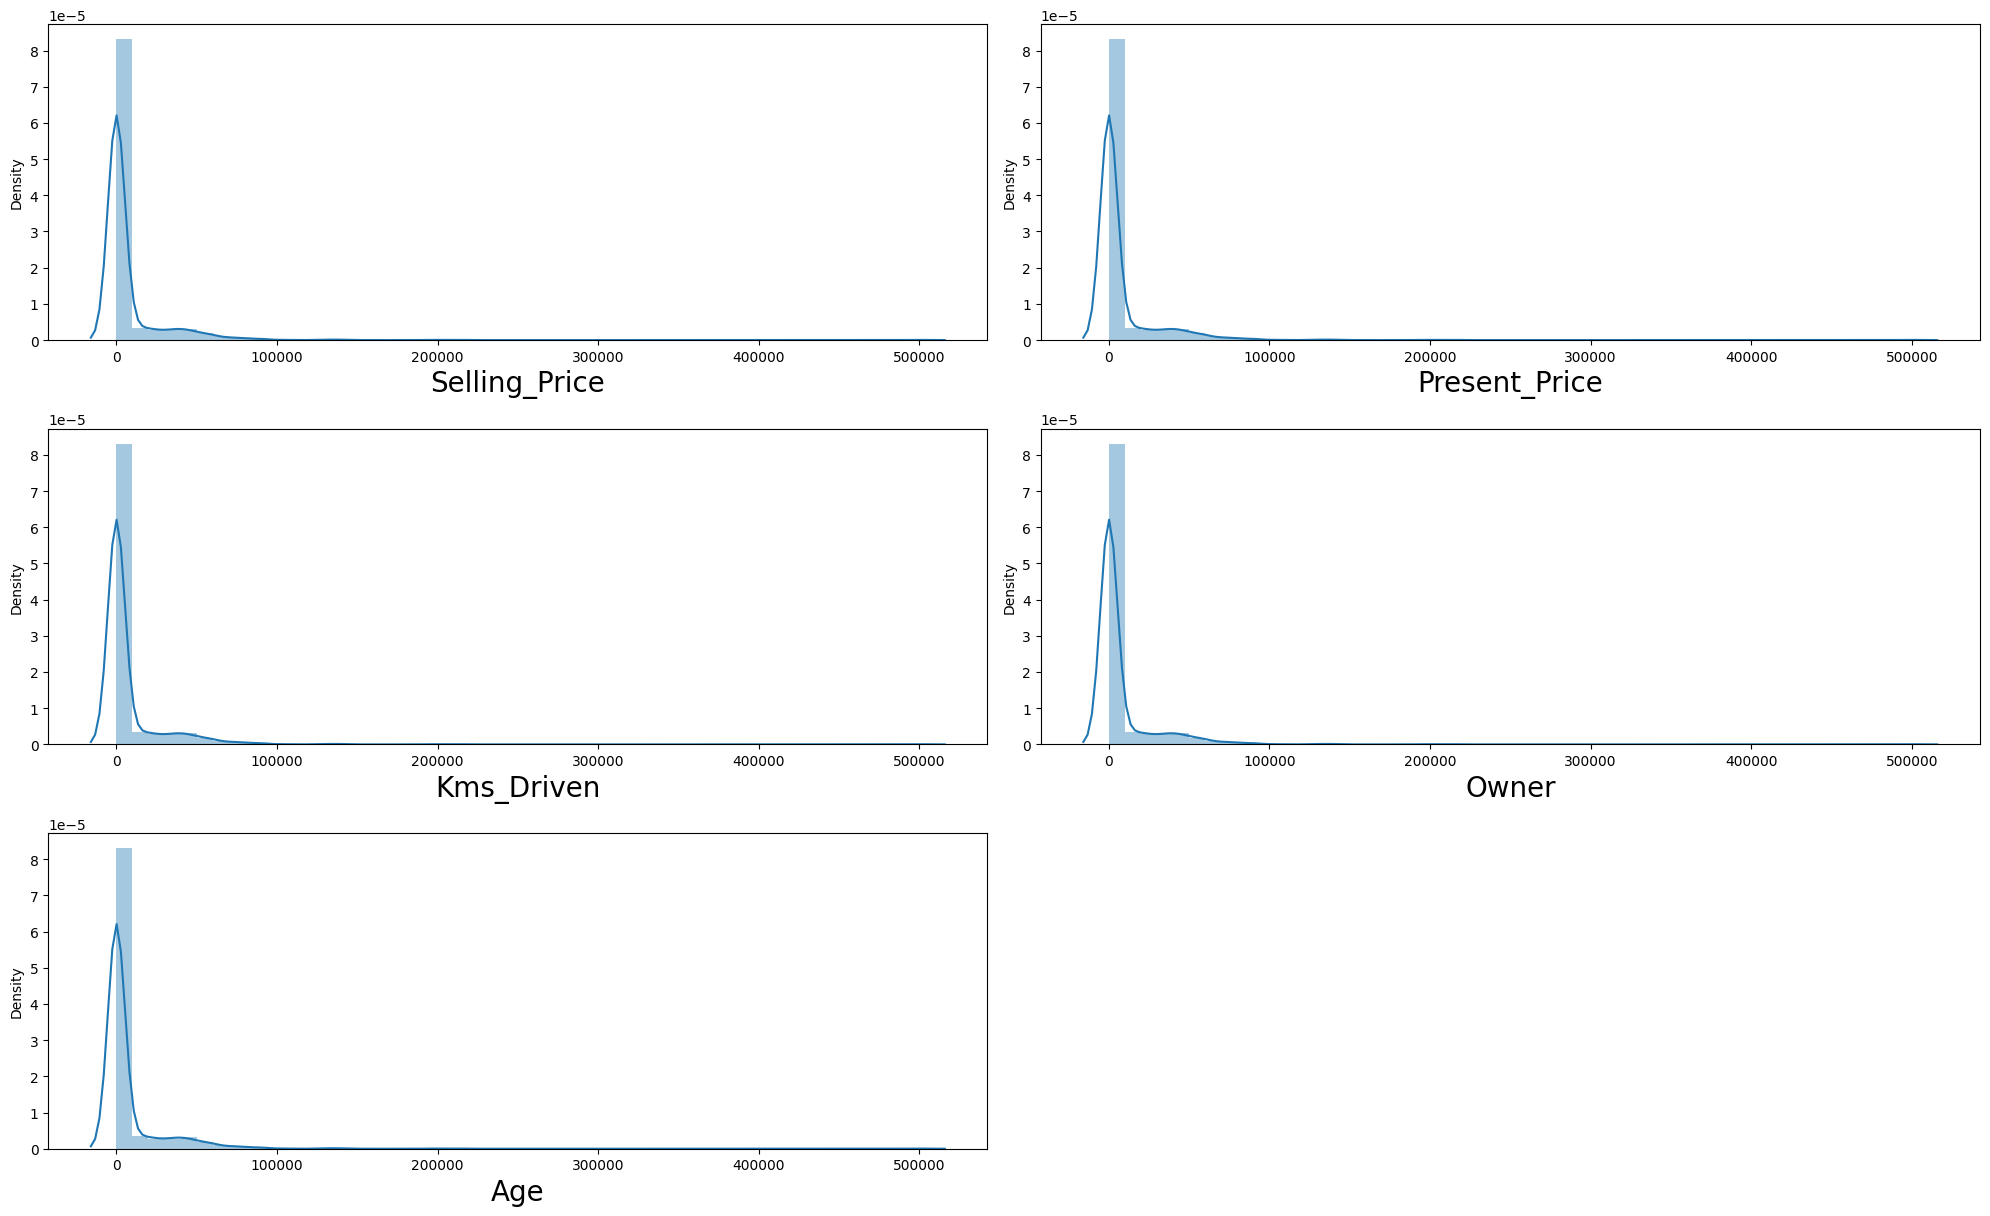

In [232]:
num_col = df.select_dtypes("number").columns.to_list()

plt.figure(figsize=(20,40))
plotnum = 1
for columns in df[num_col]:
    if plotnum <= len(df[num_col].columns) :
        ax=plt.subplot(10,2,plotnum)
        sns.distplot(df[num_col])
        plt.xlabel(columns,fontsize=20)
    plotnum += 1
plt.tight_layout()
plt.show()

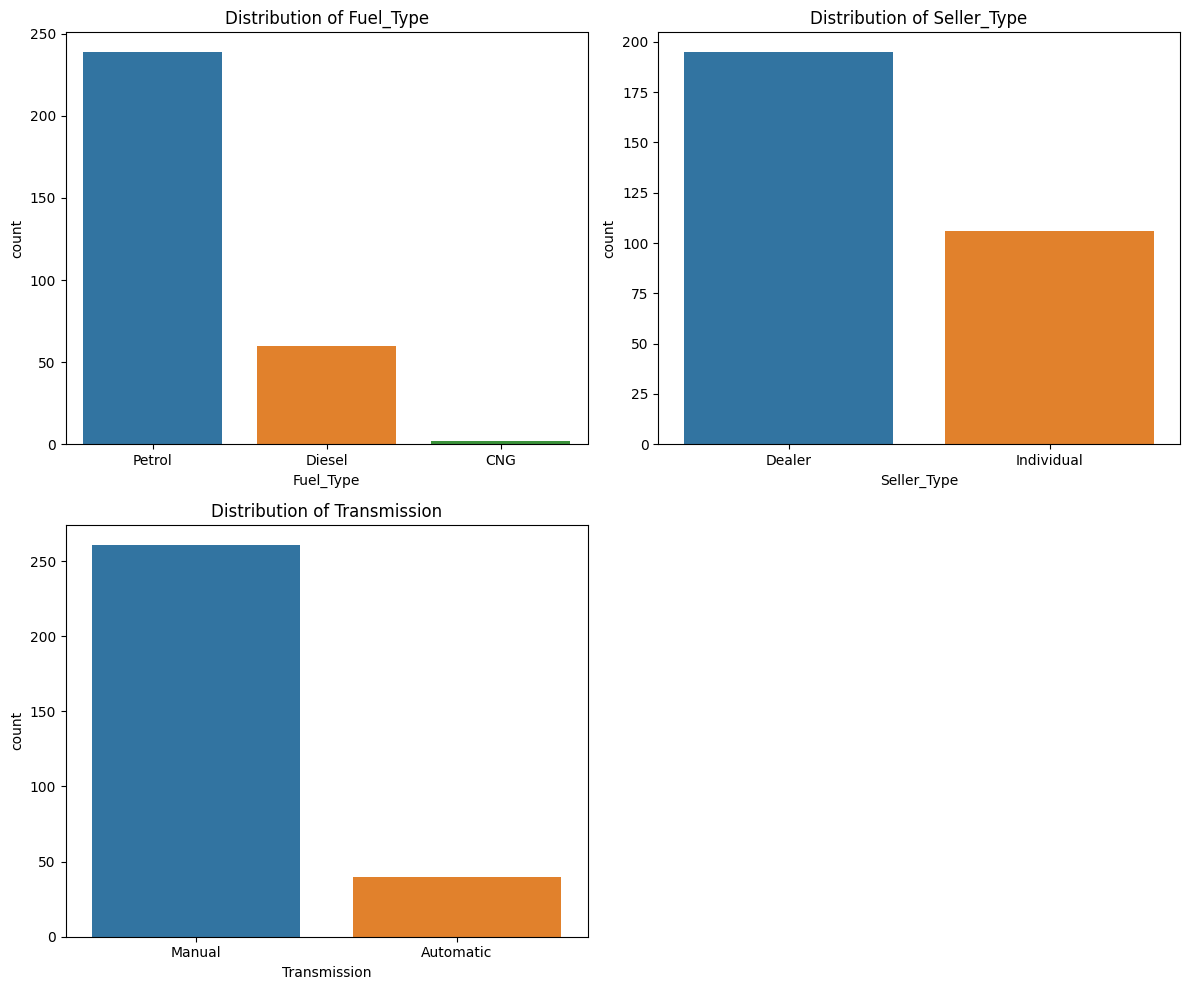

In [233]:
df.drop("Car_Name",axis=1,inplace=True)
cat_col=df.select_dtypes("object")
max_plots = cat_col.shape[1]
limited_cols = cat_col[:max_plots]

rows = math.ceil(len(limited_cols) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(limited_cols):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].tick_params(axis="x", rotation=0)

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

<Axes: >

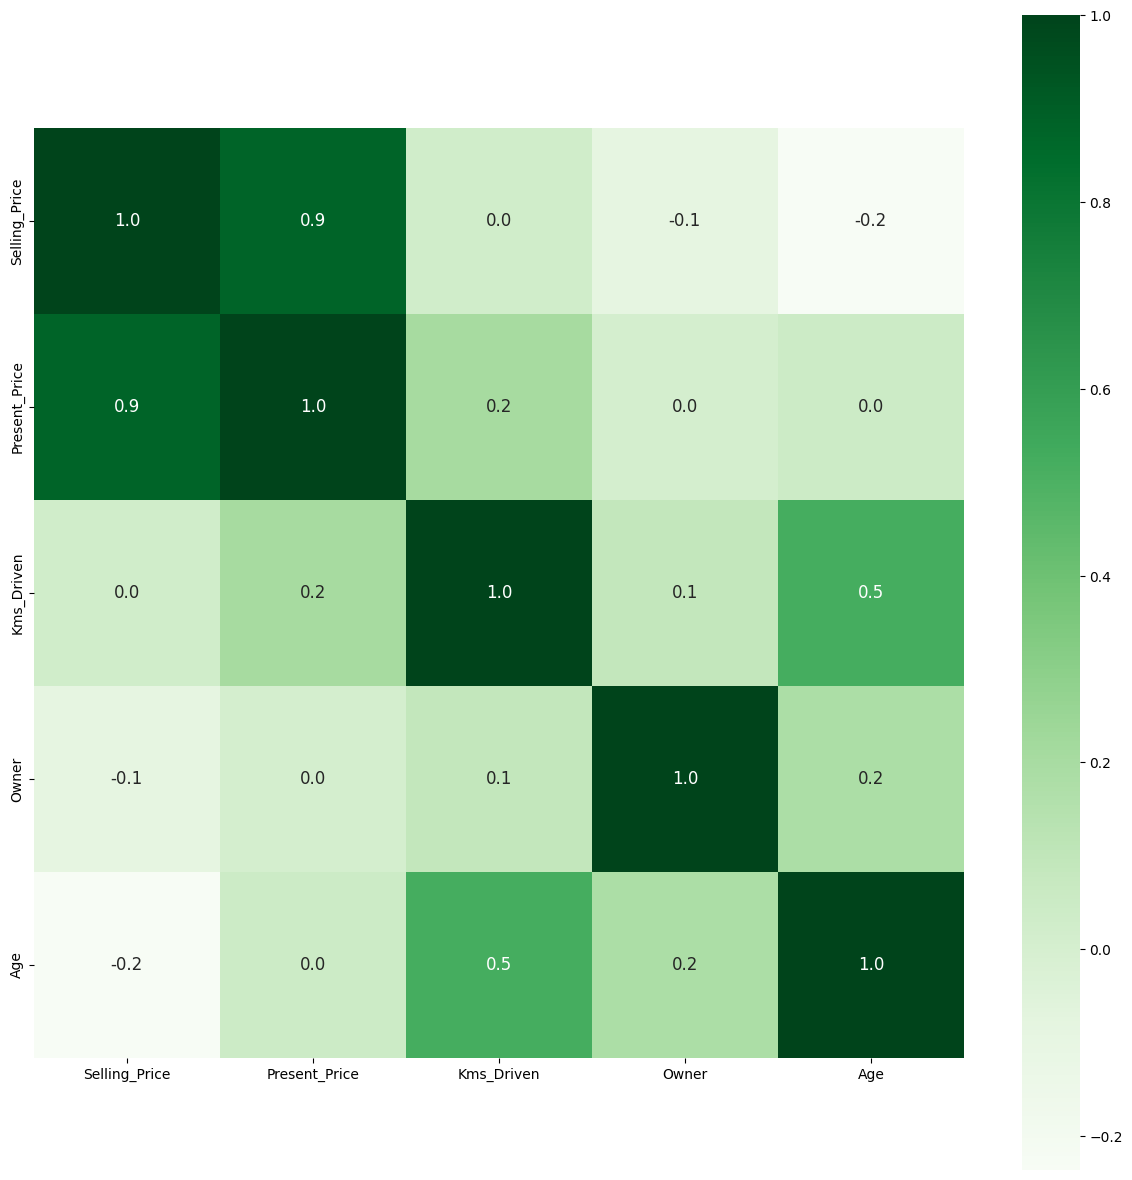

In [234]:
corr=df[num_col].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':12},cmap='Greens')

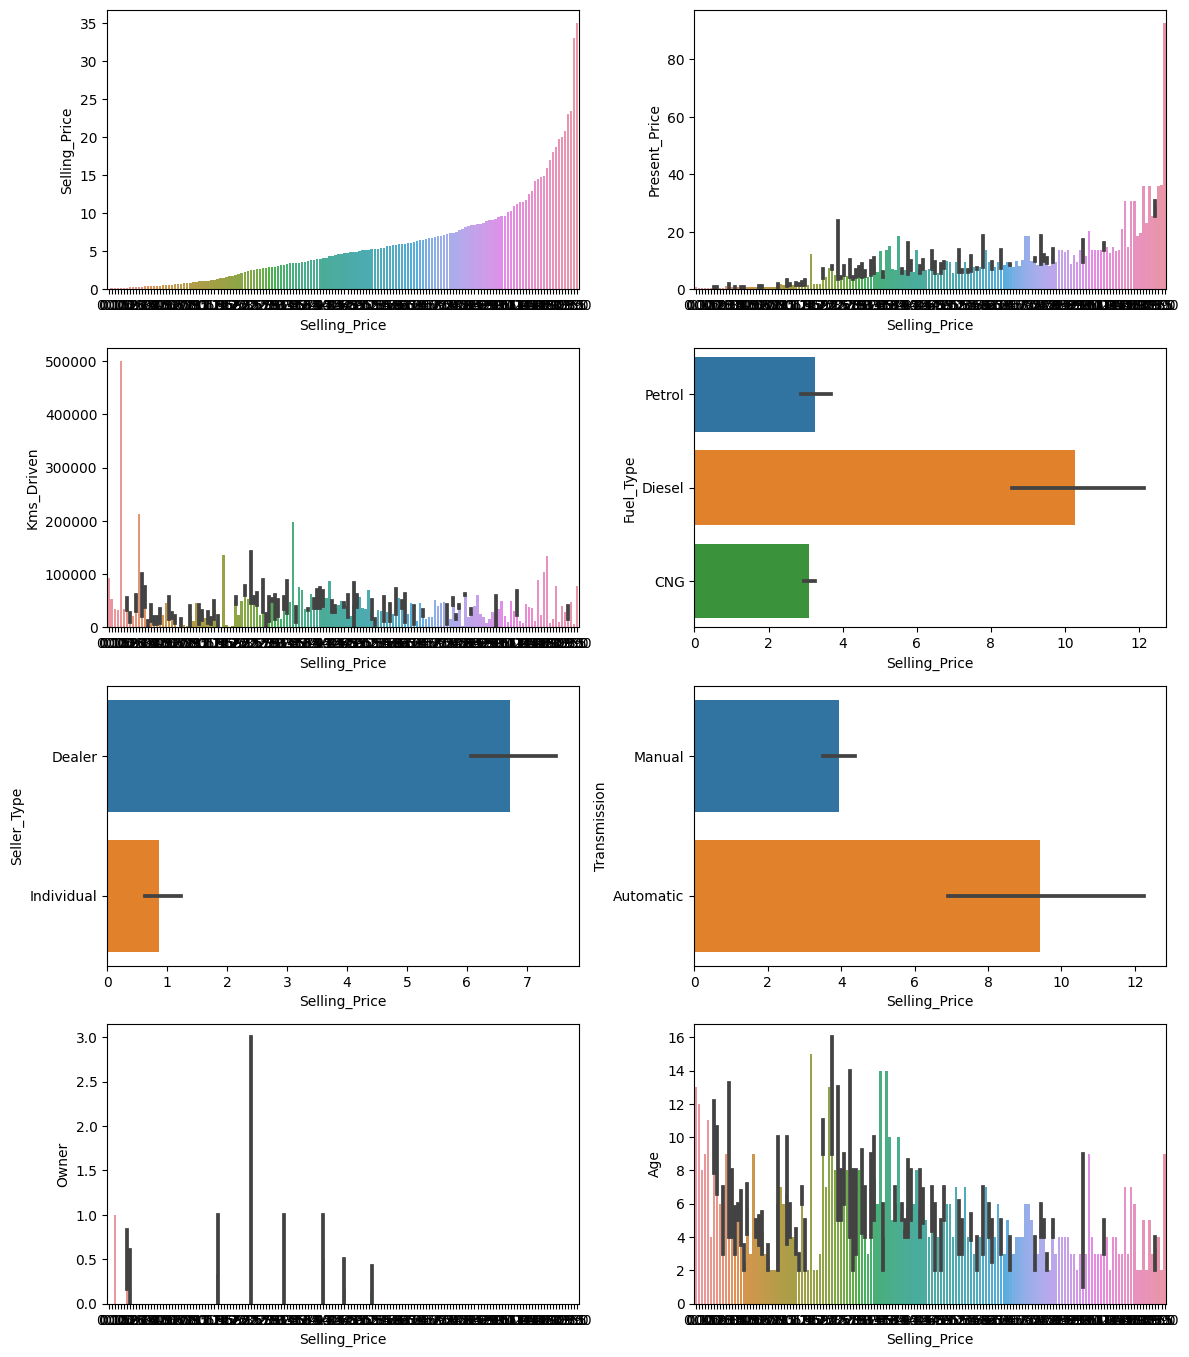

In [235]:
plt.figure(figsize=(12,20))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(6,2,plotnum)
        sns.barplot(x="Selling_Price",y=df[columns], data=df)

    plotnum += 1
plt.tight_layout()
plt.show()

In [236]:
print(df[num_col].skew())

Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
Age              1.246189
dtype: float64

In [237]:
print(df[num_col].kurt())

Selling_Price     8.902970
Present_Price    31.701024
Kms_Driven       68.563569
Owner            73.325141
Age               1.533319
dtype: float64

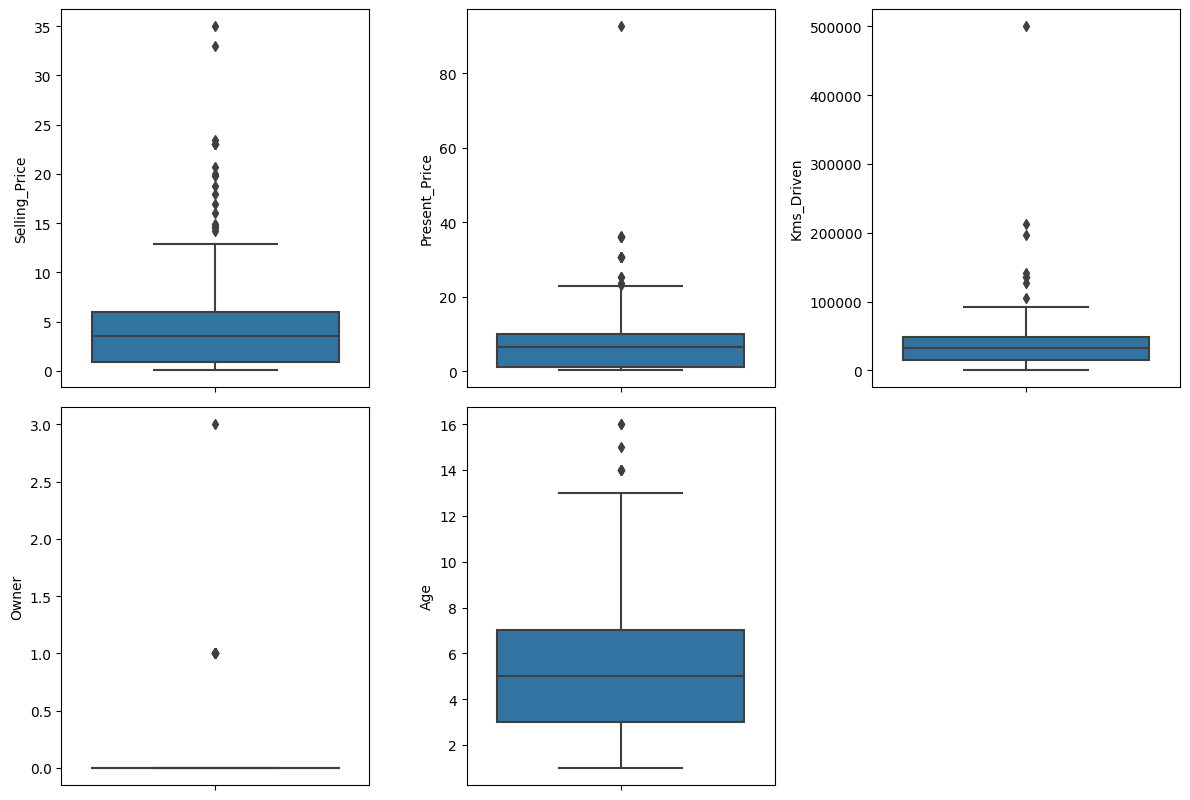

In [238]:
plt.figure(figsize=(12,20))
plotnum = 1
for columns in df[num_col]:
    if plotnum <= len(df[num_col].columns) :
        ax=plt.subplot(5,3,plotnum)
        sns.boxplot(y=df[columns])

    plotnum += 1
plt.tight_layout()
plt.show()

In [239]:

for col in cat_col.columns:
    print(f"The counts of {col} are:")
    print(df[col].value_counts())
    print()

The counts of Fuel_Type are:

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

The counts of Seller_Type are:

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

The counts of Transmission are:

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## 📄 information about Dataset

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   Age            301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


## 🧹 Null & NAN & Duplicated

In [241]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  0

The Number of NAN in DataFrame is:  0

The Number of duplicated in DataFrame is:  2

In [242]:
df.drop_duplicates(inplace=True)

In [243]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  0

The Number of NAN in DataFrame is:  0

The Number of duplicated in DataFrame is:  0

# ⚙️ Prepare Data for models

## 🧮 Label Encoder

In [244]:
encoder = LabelEncoder()
for i in cat_col:
    df[i] = encoder.fit_transform(df[i])


print("[green]Data Encoded Successfully...[green]")

Data Encoded Successfully...

## 📐 Standarized Data

In [245]:
scaler = RobustScaler()
scaled = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled, columns=df.columns, index=df.index)

print("[green]Data standerized Successfully...[green]")

Data standerized Successfully...

## 🔄⚖️Handeling outliers

In [246]:
for i in df.columns:
    df[i] = np.log1p(df[i])

print("[green]Data handeled Successfully...[green]")

Data handeled Successfully...

## ✂️ Separating the data

In [247]:
y = df['Selling_Price']
X = df.drop('Selling_Price',axis=1)

## 🔀 Splitting the data into train, test, and validate

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [249]:
print("X shape:", X.shape)
print("y shape:", y.shape)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_validate shape:", X_val.shape)

print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)
print("Y_validate shape:", y_val.shape)

X shape:
(299, 7)

y shape:
(299,)

X_train shape:
(209, 7)

X_test shape:
(45, 7)

X_validate shape:
(45, 7)

Y_train shape:
(209,)

Y_test shape:
(45,)

Y_validate shape:
(45,)

# 🤖 Train Model

In [250]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [251]:
CV = []
R2_train = []
R2_val = []
R2_test = []
results = []  # هنا هنجمع كل الموديلات ونتايجها

def car_pred_model(model, model_name):
    model.fit(X_train, y_train)
    
    # Train
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    # Validation
    y_pred_val = model.predict(X_val)
    R2_val_model = r2_score(y_val, y_pred_val)
    R2_val.append(round(R2_val_model, 2))
    
    # Test
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))
    
    # Cross-validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # Save results
    results.append({
        "Model": model_name,
        "Train R2": round(R2_train_model, 2),
        "Validation R2": round(R2_val_model, 2),
        "Test R2": round(R2_test_model, 2),
        "CV Mean": round(cv_mean, 2)
    })
    
    print(f"Model: {model_name}")
    print("Train R2-score :", round(R2_train_model, 2))
    print("Validation R2-score :", round(R2_val_model, 2))
    print("Test R2-score :", round(R2_test_model, 2))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 2))
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    
    ax[0].set_title('Residual Plot (Train)')
    sns.histplot((y_train - y_pred_train), kde=True, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    ax[1].set_title('Residual Plot (Validation)')
    sns.histplot((y_val - y_pred_val), kde=True, ax=ax[1])
    ax[1].set_xlabel('y_val - y_pred_val')
    
    ax[2].set_title('y_test vs y_pred_test')
    ax[2].scatter(y_test, y_pred_test)
    ax[2].set_xlabel('y_test')
    ax[2].set_ylabel('y_pred_test')
    
    plt.show()


Model: Linear_regressor.pkl

Train R2-score : 0.97

Validation R2-score : 0.91

Test R2-score : 0.95

Train CV scores : [0.95026445 0.96830227 0.97501955 0.96472606 0.96795418]

Train CV mean : 0.97

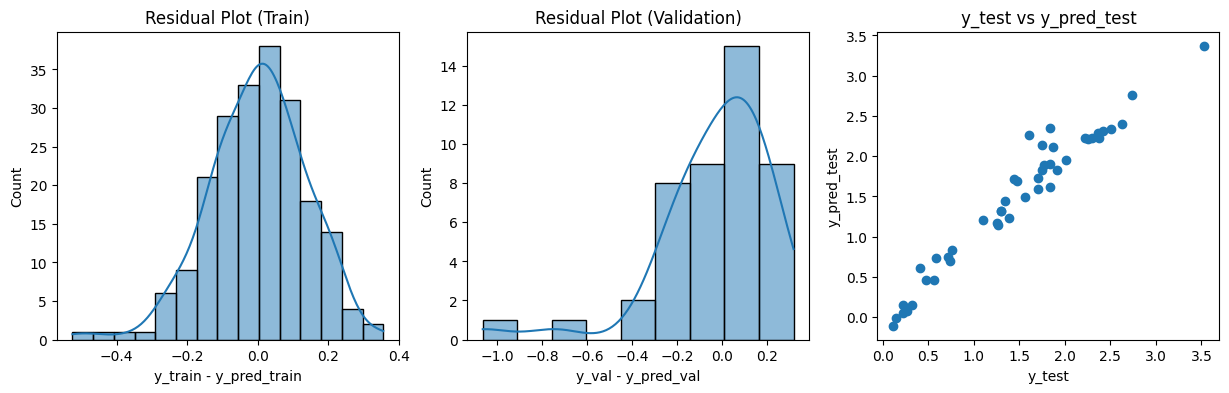

In [252]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Model: gradient_boosting.pkl

Train R2-score : 1.0

Validation R2-score : 0.91

Test R2-score : 0.91

Train CV scores : [0.97133469 0.94312139 0.97552241 0.97831358 0.98504258]

Train CV mean : 0.97

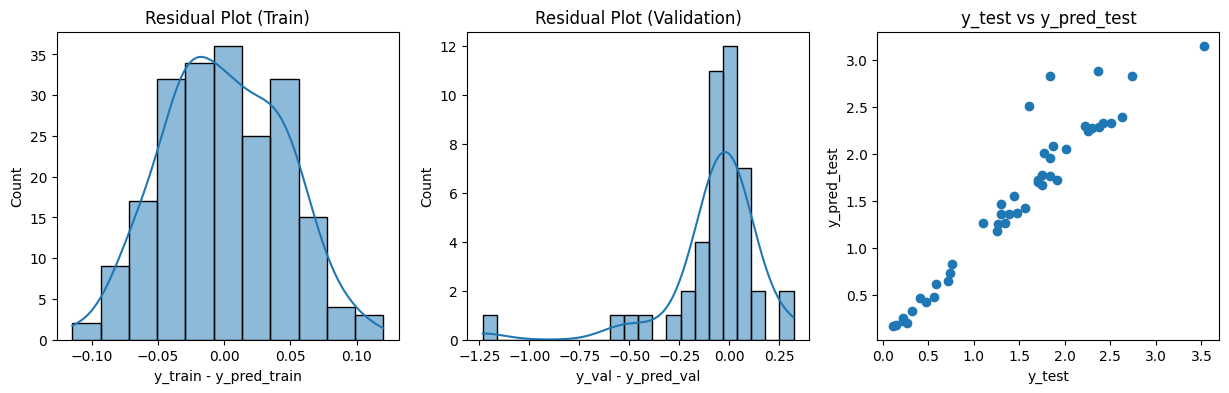

In [253]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
car_pred_model(gb,"gradient_boosting.pkl")

Model: random_forest.pkl

Train R2-score : 1.0

Validation R2-score : 0.83

Test R2-score : 0.82

Train CV scores : [0.97380441 0.95904246 0.9728885  0.9819271  0.98652401]

Train CV mean : 0.97

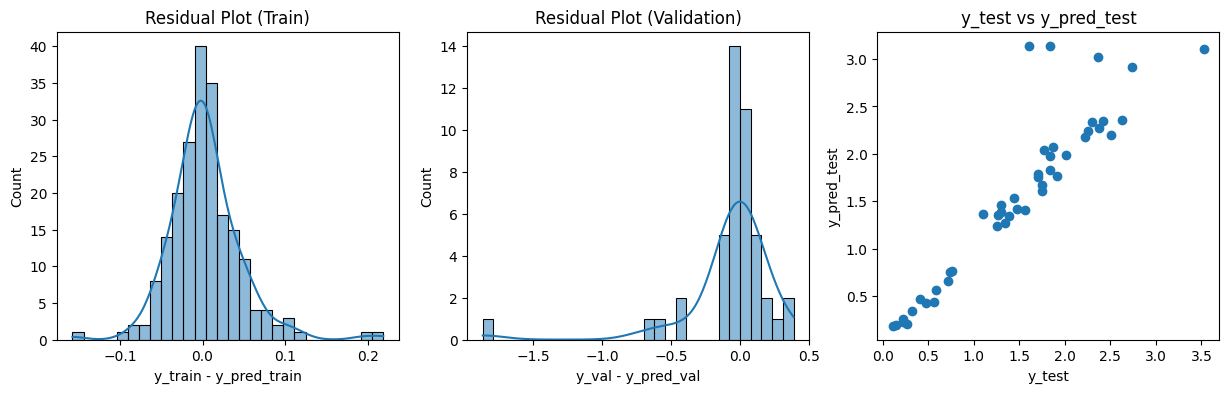

In [254]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
car_pred_model(rf,'random_forest.pkl')


Model: ridge.pkl

Train R2-score : 0.97

Validation R2-score : 0.91

Test R2-score : 0.95

Train CV scores : [0.95132186 0.96634648 0.97478189 0.96528397 0.96871141]

Train CV mean : 0.97

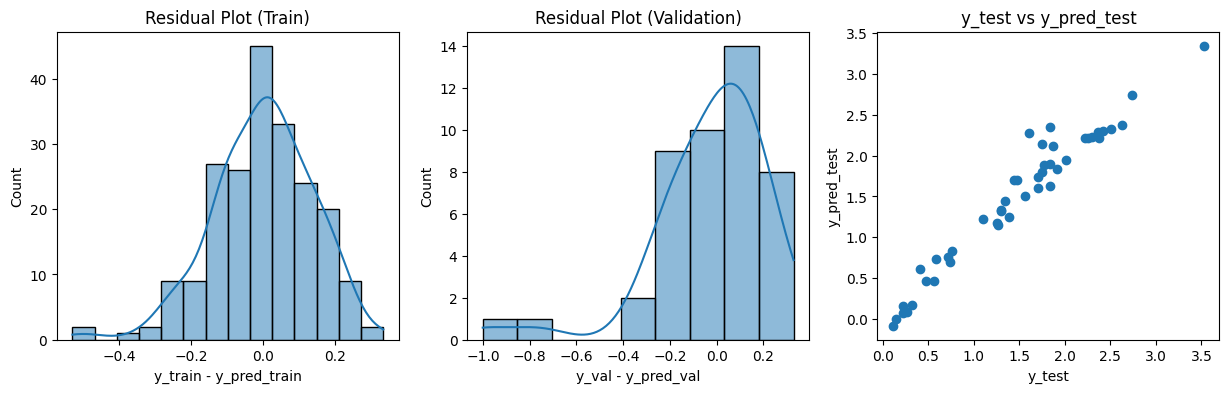

In [255]:
from sklearn.linear_model import Ridge


rg = Ridge()

car_pred_model(rg,"ridge.pkl")

In [256]:
results_df = pd.DataFrame(results)

display(results_df.sort_values(by="Test R2", ascending = False).style.background_gradient(cmap="Greens"))

,Model,Train R2,Validation R2,Test R2,CV Mean
0,Linear_regressor.pkl,0.970000,0.910000,0.950000,0.970000
3,ridge.pkl,0.970000,0.910000,0.950000,0.970000
1,gradient_boosting.pkl,1.000000,0.910000,0.910000,0.970000
2,random_forest.pkl,1.000000,0.830000,0.820000,0.970000


# 🎉 Thank You

# Made by : Ali Osama ✍️

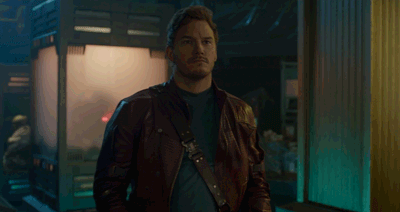